<a href="https://colab.research.google.com/github/BJB0/Anamoly_Detection_ML/blob/main/Anamoly_Detection_timeseries_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANAMOLY DETECTION IN TIME SERIES**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [62]:
plt.rcParams["figure.figsize"]=(9,6)

The dataset used here is a real-life data on CPU utilization of an EC2 instance in the AWS cloud. Data was recorded every 5 minutes, starting on February 14th at 14:30. The dataset contains 4032 data points

Labels can be obtained from here : [Github]('https://github.com/numenta/NAB/blob/master/labels/combined_labels.json)

In [63]:
df =pd.read_csv('/content/ec2_cpu_utilization_24ae8d.csv')
df.head()

,timestamp,value
0,2014-02-14 14:30:00,0.132
1,2014-02-14 14:35:00,0.134
2,2014-02-14 14:40:00,0.134
3,2014-02-14 14:45:00,0.134
4,2014-02-14 14:50:00,0.134


In [64]:
anomalies_timestamp = [
    '2014-02-26 22:05:00',
    '2014-02-27 17:15:00'
]

In [65]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,value
0,2014-02-14 14:30:00,0.132
1,2014-02-14 14:35:00,0.134
2,2014-02-14 14:40:00,0.134
3,2014-02-14 14:45:00,0.134
4,2014-02-14 14:50:00,0.134


In [66]:
df['is_anamoly']=1
for each in anomalies_timestamp:
  df.loc[df['timestamp'] == each, 'is_anamoly'] = -1

df.head()

,timestamp,value,is_anamoly
0,2014-02-14 14:30:00,0.132,1
1,2014-02-14 14:35:00,0.134,1
2,2014-02-14 14:40:00,0.134,1
3,2014-02-14 14:45:00,0.134,1
4,2014-02-14 14:50:00,0.134,1


In [67]:
anamoly_df = df.loc[df['is_anamoly'] == -1]
inlier_df = df.loc[df['is_anamoly'] == 1]

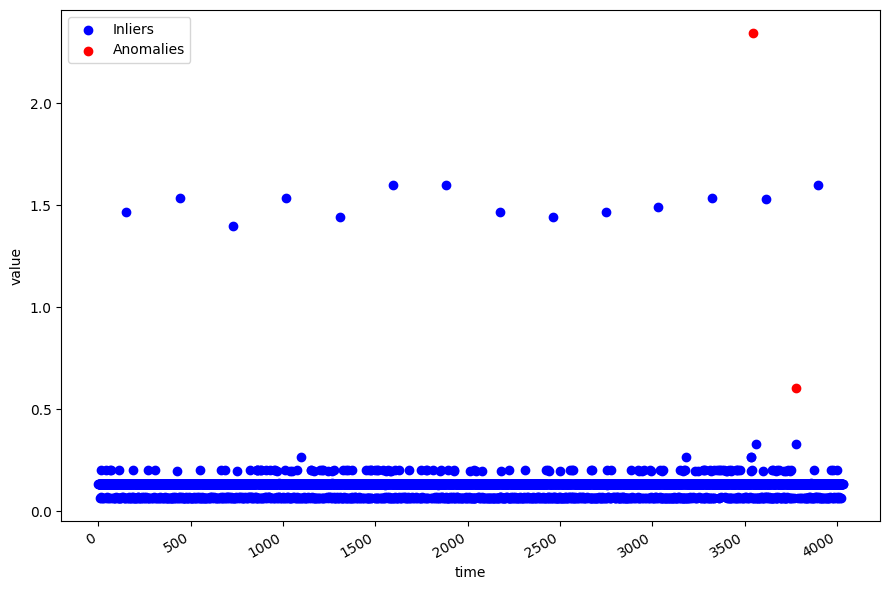

In [68]:
fig, ax  = plt.subplots()

ax.scatter(inlier_df.index, inlier_df['value'], color='blue', label='Inliers')
ax.scatter(anamoly_df.index, anamoly_df['value'], color='red', label='Anomalies')
ax.set_xlabel('time')
ax.set_ylabel('value')
ax.legend(loc=2)


plt.grid(False)
fig.autofmt_xdate()
plt.tight_layout()

**ISOLATION FOREST**

In [69]:
from sklearn.ensemble import IsolationForest

In [70]:
train=df[:3550]
test =df[3500:] #startig the test set exactly where the trains et ends


In [71]:
contamination = 1/len(train)     #contamination here is basically the level of anomalous points in the training data

iso_forest = IsolationForest(contamination=contamination, random_state=42)

X_train = train['value'].values.reshape(-1,1)

iso_forest.fit(X_train)

IsolationForest(contamination=0.00028169014084507044, random_state=42)

In [72]:
preds_iso_forest = iso_forest.predict(test['value'].values.reshape(-1,1))

Evaluation

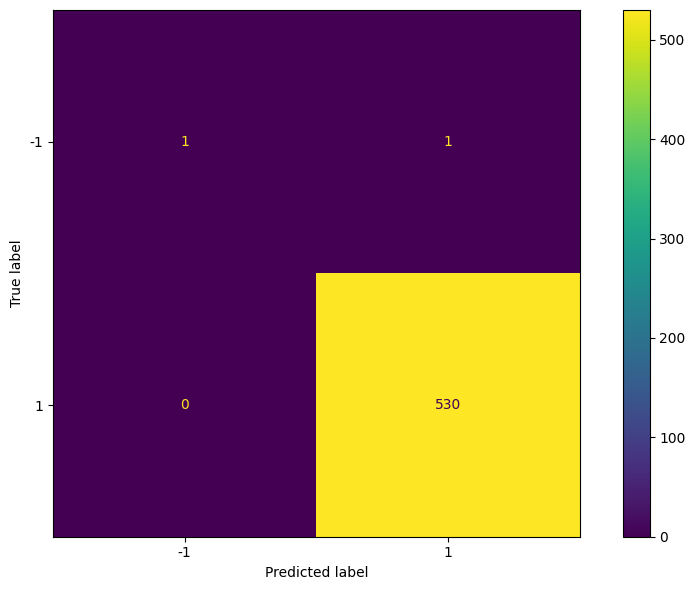

In [73]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test['is_anamoly'], preds_iso_forest, labels=[-1,1])

disp_cm = ConfusionMatrixDisplay(cm, display_labels=[-1,1])

disp_cm.plot()
plt.grid(False)


plt.tight_layout()


**LOCAL OUTLIER FACTOR(LOF)**

In [74]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=contamination, novelty=True)

lof.fit(X_train)

LocalOutlierFactor(contamination=0.00028169014084507044, novelty=True)

In [75]:
preds_lof = lof.predict(test['value'].values.reshape(-1,1))

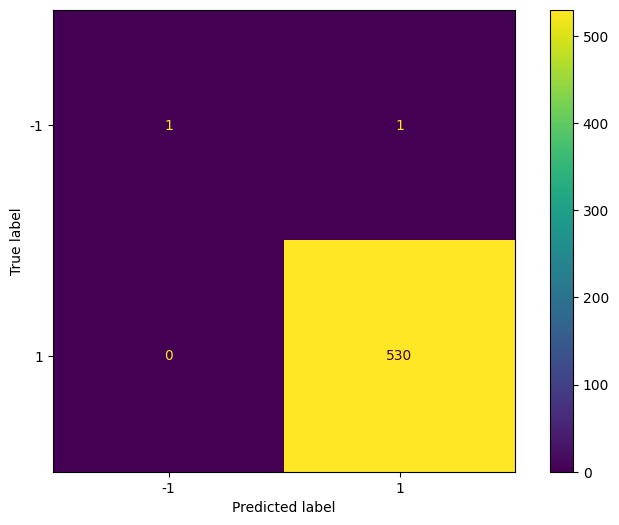

In [76]:
cm =confusion_matrix(test['is_anamoly'], preds_lof, labels=[-1,1])

disp_cm = ConfusionMatrixDisplay(cm, display_labels=[-1,1])

disp_cm.plot()